Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 31, 31, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 28802     
Total params: 67,522
Trainable params: 67,522
Non-trainable params: 0
_________________________________________________________________


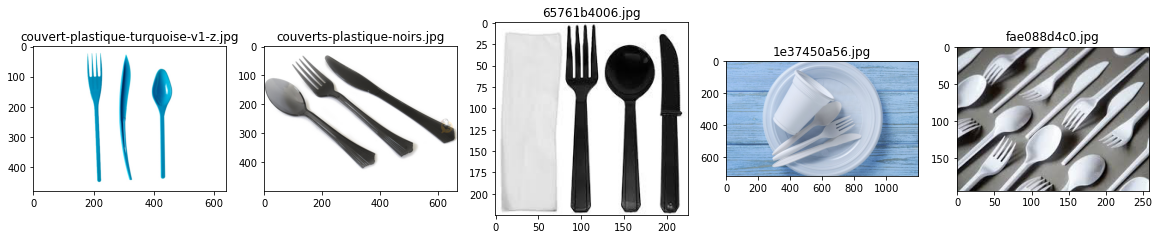

In [61]:
import pandas as pd
import numpy as np
import random
import os
import tensorflow as tf
import cv2
from tensorflow import keras
import tensorflow.keras 
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline


plt.figure(figsize=(20,20))
test_folder=r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera'
img_folder = r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera/propre/'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
IMG_WIDTH=64
IMG_HEIGHT=64


def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/test')

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(2)
        ])
model.summary()


In [62]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])



In [64]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation
from tensorflow.keras import layers
from keras.models import Sequential
import tensorflow as tf
import keras
from keras.layers import Dropout

In [65]:
gen = ImageDataGenerator()

In [66]:
!pwd

/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/src


In [67]:
train_gen = ImageDataGenerator(rescale = 1./255)
test_gen = ImageDataGenerator(rescale = 1./255)
train_generator = train_gen.flow_from_directory('../static/images/camera/train',
                                                target_size=(64,64))
validation_generator = test_gen.flow_from_directory('../static/images/camera/test',
                                                    target_size=(64,64))

Found 154 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [68]:
%%time
model.fit( train_generator, validation_data = validation_generator ,epochs=10)

Epoch 1/10
5/5 [==============================] - 3s 320ms/step - loss: 5.1206 - accuracy: 0.5829 - val_loss: 7.0101 - val_accuracy: 0.4769
Epoch 2/10
5/5 [==============================] - 1s 215ms/step - loss: 6.4318 - accuracy: 0.4344 - val_loss: 3.6928 - val_accuracy: 0.4769
Epoch 3/10
5/5 [==============================] - 1s 237ms/step - loss: 3.2146 - accuracy: 0.4250 - val_loss: 0.8099 - val_accuracy: 0.5538
Epoch 4/10
5/5 [==============================] - 1s 233ms/step - loss: 0.7476 - accuracy: 0.6321 - val_loss: 0.6877 - val_accuracy: 0.5385
Epoch 5/10
5/5 [==============================] - 1s 238ms/step - loss: 0.6836 - accuracy: 0.6813 - val_loss: 0.6710 - val_accuracy: 0.7846
Epoch 6/10
5/5 [==============================] - 1s 230ms/step - loss: 0.6496 - accuracy: 0.7936 - val_loss: 0.5820 - val_accuracy: 0.8000
Epoch 7/10
5/5 [==============================] - 1s 242ms/step - loss: 0.5830 - accuracy: 0.7439 - val_loss: 0.5365 - val_accuracy: 0.8154
Epoch 8/10
5/5 [====

In [82]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

   
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.


datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
    
# Loading a sample image 
img = load_img('../static/images/camera/propre/couvert-plastique-turquoise-v1-z.jpg') 
# Converting the input sample image to an array
x = img_to_array(img)
# Reshaping the input image
x = x.reshape((1, ) + x.shape) 
   
# Generating and saving 5 augmented samples 
# using the above defined parameters. 
i = 0
for batch in datagen.flow(x, batch_size = 1,
                          save_to_dir ='../static/images/camera/test/propre', 
                          save_prefix ='image', save_format ='jpg'):
    i += 1
    if i > 15:
        break


# Importing necessary library
import Augmentor
SOURCE = "/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera/propre/"
OUTPUT = "/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera/test/propre/"
# Passing the path of the image directory
p = Augmentor.Pipeline(source_directory=SOURCE , output_directory=OUTPUT)
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(5)


Initialised with 5 image(s) found.
Output directory set to /Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera/test/propre/.

Processing <PIL.Image.Image image mode=RGB size=458x458 at 0x189CCC040>: 100%|█|


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 63, 63, 64)        1792      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 6274      
Total params: 118,850
Trainable params: 118,850
Non-trainable params: 0
________________________________________________

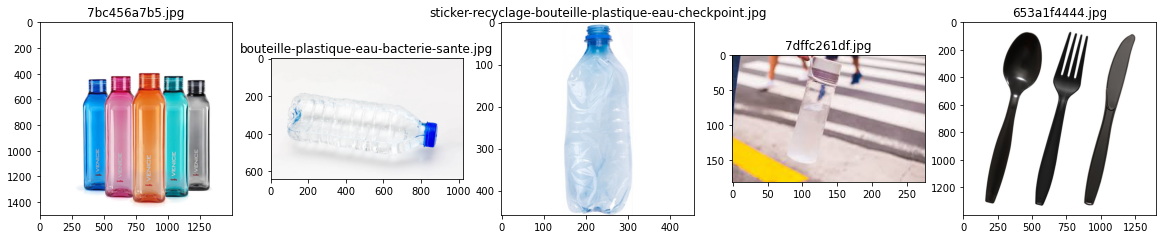

In [93]:
import pandas as pd
import numpy as np
import random
import os
import tensorflow as tf
import cv2
from tensorflow import keras
import tensorflow.keras 
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline


plt.figure(figsize=(20,20))
test_folder=r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera'
img_folder = r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera/propre/'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
IMG_WIDTH=128
IMG_HEIGHT=128


def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/test')

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(2)
        ])
model.summary()


In [94]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:

gen = ImageDataGenerator()
train_gen = ImageDataGenerator(rescale = 1./255)
test_gen = ImageDataGenerator(rescale = 1./255)
train_generator = train_gen.flow_from_directory('../static/images/camera/train',
                                                target_size=(128,128))
validation_generator = test_gen.flow_from_directory('../static/images/camera/test',
                                                    target_size=(128,128))



Found 154 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


In [97]:
%%time
model.fit( train_generator, validation_data = validation_generator ,epochs=10)

Epoch 1/10
5/5 [==============================] - 3s 520ms/step - loss: 4.8965 - accuracy: 0.4339 - val_loss: 6.8623 - val_accuracy: 0.1449
Epoch 2/10
5/5 [==============================] - 2s 369ms/step - loss: 4.7737 - accuracy: 0.4312 - val_loss: 6.9785 - val_accuracy: 0.1449
Epoch 3/10
5/5 [==============================] - 2s 355ms/step - loss: 5.0116 - accuracy: 0.3972 - val_loss: 6.9213 - val_accuracy: 0.1449
Epoch 4/10
5/5 [==============================] - 2s 342ms/step - loss: 4.9242 - accuracy: 0.4063 - val_loss: 6.9735 - val_accuracy: 0.1449
Epoch 5/10
5/5 [==============================] - 2s 348ms/step - loss: 4.9396 - accuracy: 0.4029 - val_loss: 6.8939 - val_accuracy: 0.1449
Epoch 6/10
5/5 [==============================] - 2s 346ms/step - loss: 4.6180 - accuracy: 0.4459 - val_loss: 6.8021 - val_accuracy: 0.1449
Epoch 7/10
5/5 [==============================] - 2s 361ms/step - loss: 5.1079 - accuracy: 0.3737 - val_loss: 6.8693 - val_accuracy: 0.1449
Epoch 8/10
5/5 [====

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 64)        4864      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 64)        102464    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        102464    
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 5, 5, 64)          102464    
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                80050     
_________________________________________________________________
dropout (Dropout)            (None, 50)               

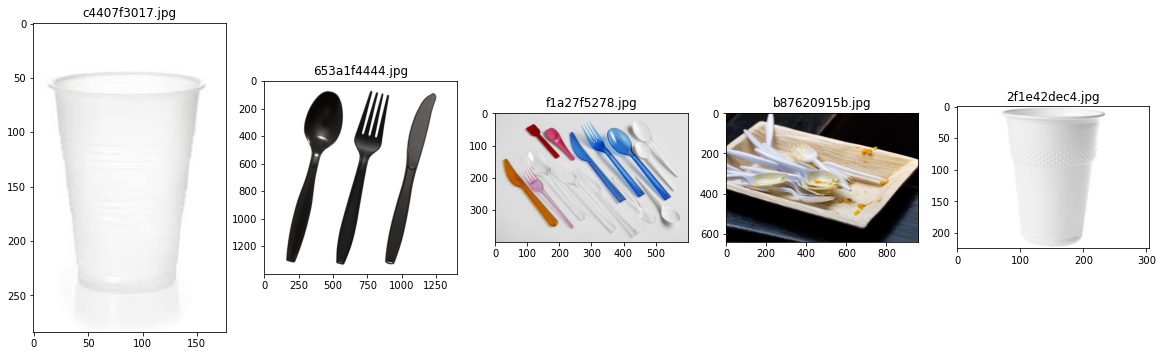

In [99]:
import pandas as pd
import numpy as np
import random
import os
import tensorflow as tf
import cv2
from tensorflow import keras
import tensorflow.keras 
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline


plt.figure(figsize=(20,20))
test_folder=r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera'
img_folder = r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/camera/propre/'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
IMG_WIDTH=128
IMG_HEIGHT=128


def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/Users/opheliesabanowski/Desktop/exercices/ProjetP8Triof/triof/static/images/test')

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units = 50 , activation = 'relu'), Dropout(0.3),
            tf.keras.layers.Dense(units = 2 , activation = 'sigmoid')
        ])
model.summary()


In [100]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:

gen = ImageDataGenerator()
train_gen = ImageDataGenerator(rescale = 1./255)
test_gen = ImageDataGenerator(rescale = 1./255)
train_generator = train_gen.flow_from_directory('../static/images/camera/train',
                                                target_size=(128,128))
validation_generator = test_gen.flow_from_directory('../static/images/camera/test',
                                                    target_size=(128,128))

Found 154 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


In [102]:
%%time
model.fit( train_generator, validation_data = validation_generator ,epochs=20)

Epoch 1/20
5/5 [==============================] - 3s 575ms/step - loss: 0.6878 - accuracy: 0.5433 - val_loss: 0.6474 - val_accuracy: 0.8551
Epoch 2/20
5/5 [==============================] - 2s 500ms/step - loss: 0.6824 - accuracy: 0.5733 - val_loss: 0.6098 - val_accuracy: 0.8551
Epoch 3/20
5/5 [==============================] - 2s 490ms/step - loss: 0.6741 - accuracy: 0.5754 - val_loss: 0.5562 - val_accuracy: 0.8551
Epoch 4/20
5/5 [==============================] - 2s 476ms/step - loss: 0.6481 - accuracy: 0.6039 - val_loss: 0.6903 - val_accuracy: 0.6963
Epoch 5/20
5/5 [==============================] - 3s 659ms/step - loss: 0.6939 - accuracy: 0.5135 - val_loss: 0.6877 - val_accuracy: 0.8364
Epoch 6/20
5/5 [==============================] - 3s 531ms/step - loss: 0.6913 - accuracy: 0.5486 - val_loss: 0.6571 - val_accuracy: 0.8785
Epoch 7/20
5/5 [==============================] - 2s 465ms/step - loss: 0.6808 - accuracy: 0.5681 - val_loss: 0.5521 - val_accuracy: 0.8785
Epoch 8/20
5/5 [====